In [4]:
# installing dependencies

In [5]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Marmik\AppData\Local\Temp\pip-install-vmmy4b79\tensorflow-gpu_8f20f47cad3747369bb4182d8dbdeb55\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did no

In [6]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
alabaster                     0.7.12
altair                        4.2.2
anyio                         3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.6.0
bleach                        4.1.0
blinker                       1.5
Bottleneck                    1.3.5
brotlipy                      0.7.0
cachetools                    5.3.0
certifi                       2022.12.7
cffi      

In [7]:
import tensorflow as tf 
import os

In [8]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory(gpu, True)

In [9]:
!pip install opencv-python

In [10]:
import cv2
import imghdr

In [15]:
data_dir = 'data'

In [17]:
os.listdir(data_dir)

['Lamborghini', 'Pagani']

In [12]:
image_exts = ['jpeg','jpg','bmp','png']

In [13]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [19]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image[]{}'.format(image_path))

In [20]:
tf.data.Dataset??

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 247 files belonging to 2 classes.


In [49]:
data_iterator = data.as_numpy_iterator()

In [50]:
data_iterator

In [51]:
#getting another iterator
batch = data_iterator.next()

In [27]:
len(batch)

2

In [30]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [29]:
# Class 1 = Pagani Zonda
# Class 2 = Lamborghini Aventador
batch[1]

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

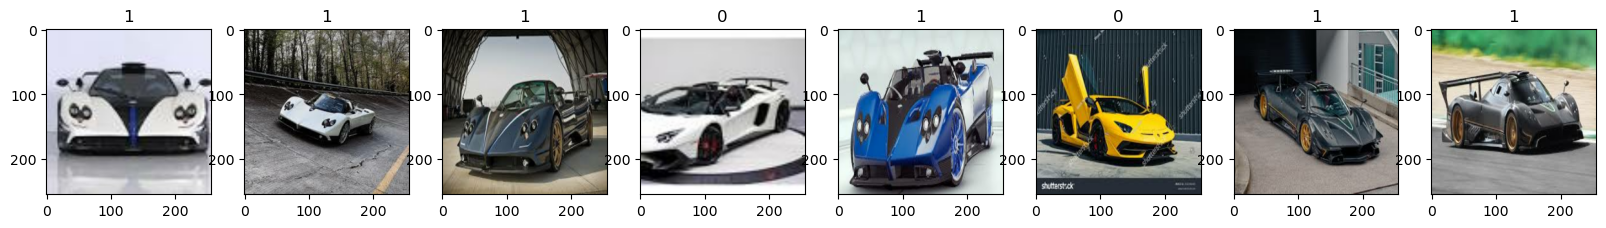

In [36]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
scaled = batch[0] / 255

In [38]:
scaled.max()

1.0

In [39]:
# Preprocess Data

In [40]:
data = data.map(lambda x, y: (x/255, y))

In [44]:
scaled_iterator = data.as_numpy_iterator()

In [42]:
scaled_iterator = data.as_numpy_iterator()

In [45]:
batch = scaled_iterator.next()

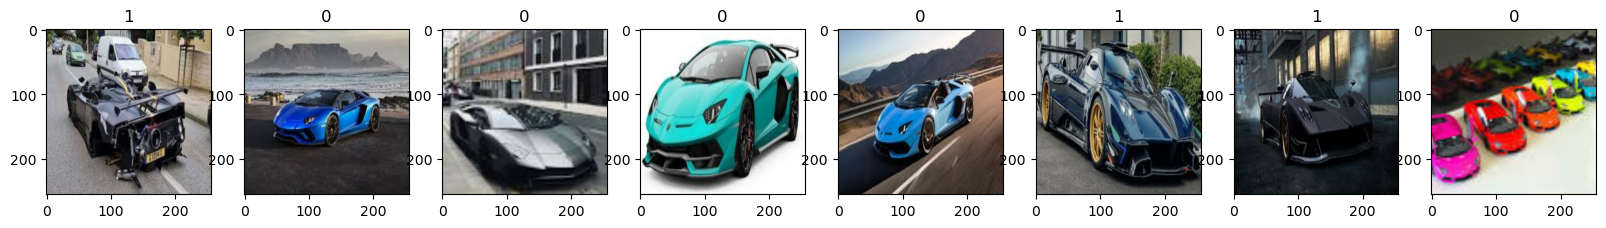

In [55]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [58]:
batch[0].min()

0.0

In [59]:
#Split data

In [60]:
8*.8

6.4

In [54]:
len(data)

8

In [62]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [63]:
train_size + val_size + test_size

8

In [64]:
train = data.take(train_size) #take decides how much data we are going to take
val = data.skip(train_size).take(val_size) #skipping data from it
test = data.skip(train_size+val_size).take(test_size)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,  Flatten, Dense, Dropout

In [92]:
model = Sequential()

In [93]:
# adding a convolutional layer and max-pooling layer
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# input layer
# 16 filters (extracting layers) (filters will try to extract information)
# and filter will have 3*3 pixels in size
# it is gonna move one pixel by one pixel
# activation relu means all the data is plotted in relu, in which everything below 0 will be gone 
# and preserve the positive layer
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
# 32 filters
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
# we are gonna condense every layer than flatten it in one layer aka transforming into one value

model.add(Dense(256, activation='relu'))
# dense are called connecting layer
model.add(Dense(1, activation='sigmoid'))
# sigmoid will show 0 for pagani or 1 for lambo

In [94]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [75]:
# adam optimizer
# metrics that we wanna track is accuracy

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 16)      

In [78]:
#Train

In [96]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
# callbacks are really important when we have to save model at some checkpoint

In [97]:
# fitting the model, epochs = number of times, it runs training data
hist = model.fit(train, epochs = 14, validation_data=val, callbacks = [tensorboard_callback])
# evaluation on validation data
# logout everything and store in tensor board

Epoch 1/14
5/5 [==============================] - 6s 769ms/step - loss: 35.2201 - accuracy: 0.4938 - val_loss: 8.1723 - val_accuracy: 0.4844
Epoch 2/14
5/5 [==============================] - 4s 729ms/step - loss: 4.5207 - accuracy: 0.5125 - val_loss: 1.3585 - val_accuracy: 0.5781
Epoch 3/14
5/5 [==============================] - 3s 676ms/step - loss: 1.4801 - accuracy: 0.6062 - val_loss: 0.6564 - val_accuracy: 0.6719
Epoch 4/14
5/5 [==============================] - 3s 690ms/step - loss: 0.6394 - accuracy: 0.6438 - val_loss: 0.5811 - val_accuracy: 0.6562
Epoch 5/14
5/5 [==============================] - 4s 738ms/step - loss: 0.5615 - accuracy: 0.7250 - val_loss: 0.4692 - val_accuracy: 0.7969
Epoch 6/14
5/5 [==============================] - 4s 751ms/step - loss: 0.5438 - accuracy: 0.7250 - val_loss: 0.4468 - val_accuracy: 0.7969
Epoch 7/14
5/5 [==============================] - 4s 751ms/step - loss: 0.3651 - accuracy: 0.8625 - val_loss: 0.4182 - val_accuracy: 0.7812
Epoch 8/14
5/5 [===

In [99]:
hist.history

{'loss': [35.220123291015625,
  4.520688056945801,
  1.4800989627838135,
  0.6393575668334961,
  0.5615270733833313,
  0.543820858001709,
  0.36508163809776306,
  0.2964820861816406,
  0.261126309633255,
  0.18421952426433563,
  0.10293179750442505,
  0.07629000395536423,
  0.03942384198307991,
  0.03601589798927307],
 'accuracy': [0.4937500059604645,
  0.512499988079071,
  0.606249988079071,
  0.643750011920929,
  0.7250000238418579,
  0.7250000238418579,
  0.862500011920929,
  0.875,
  0.9125000238418579,
  0.96875,
  0.987500011920929,
  0.987500011920929,
  0.9937499761581421,
  1.0],
 'val_loss': [8.172318458557129,
  1.3585461378097534,
  0.656395435333252,
  0.5811094045639038,
  0.46915245056152344,
  0.4468351900577545,
  0.4182164669036865,
  0.22889527678489685,
  0.23290690779685974,
  0.13724282383918762,
  0.0726657435297966,
  0.06292033195495605,
  0.03572268784046173,
  0.03105904906988144],
 'val_accuracy': [0.484375,
  0.578125,
  0.671875,
  0.65625,
  0.796875,
  0

In [100]:
#plot performance

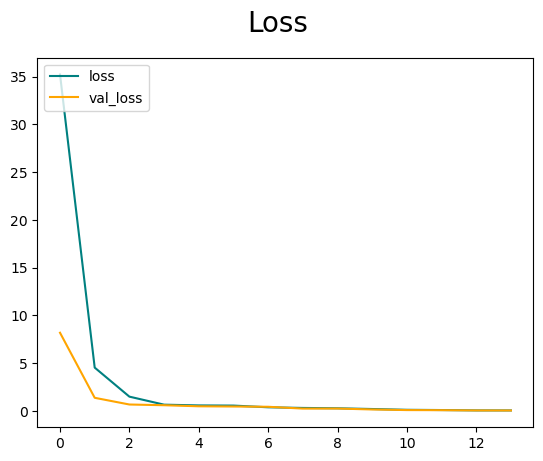

In [102]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color ='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [103]:
# Evaluate Performance

In [105]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [106]:
# these are different metrics to classify

In [107]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [108]:
len(test)

1

In [109]:
for batch in test.as_numpy_iterator():
    x, y = batch # set of the images
    yhat = model.predict(x) # output between 0 and 1
    pre.update_state(y, yhat) # update state to update metrics
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 283ms/step


In [118]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [119]:
import cv2

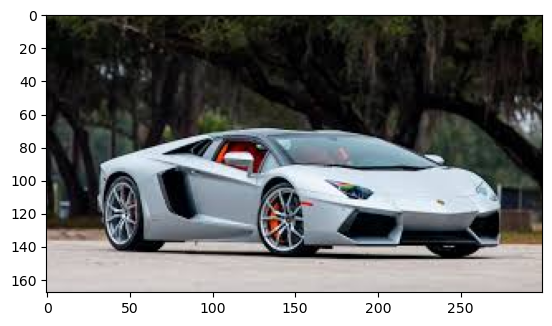

In [141]:
img  = cv2.imread('test_3.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

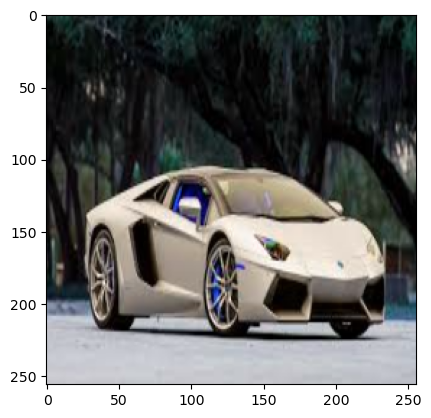

In [142]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [143]:
np.expand_dims(resize, 0)

array([[[[ 51.3125  ,  68.3125  ,  64.3125  ],
         [ 46.578125,  63.578125,  59.578125],
         [ 56.578125,  74.86719 ,  70.4375  ],
         ...,
         [ 22.289062,  43.148438,  38.148438],
         [ 24.710938,  42.484375,  38.226562],
         [ 34.226562,  49.398438,  45.398438]],

        [[ 50.02588 ,  66.14038 ,  62.14038 ],
         [ 46.43811 ,  63.43811 ,  59.43811 ],
         [ 52.559326,  70.224   ,  66.00244 ],
         ...,
         [ 24.567139,  46.187134,  41.187134],
         [ 29.070312,  47.093506,  42.835693],
         [ 30.616455,  46.67383 ,  42.67383 ]],

        [[ 45.35376 ,  60.372925,  56.372925],
         [ 43.721558,  60.440308,  56.440308],
         [ 45.1864  ,  62.026   ,  58.026   ],
         ...,
         [ 27.494263,  50.185425,  45.125   ],
         [ 33.438477,  52.285645,  47.923462],
         [ 25.696777,  43.142822,  39.002197]],

        ...,

        [[201.42188 , 201.42188 , 207.42188 ],
         [201.42188 , 201.42188 , 207.42188 ]

In [144]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [145]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 48ms/step


In [146]:
yhat

array([[0.5093118]], dtype=float32)

In [147]:
if yhat > 0.5:
    print(f'Its a lambo!!')
else:
    print(f'Its a Zonda!!')

Its a lambo!!
